# Consistency by Thibaut Louis

First a transfer function

$
\begin{align}
\tilde{a}_{\ell,m}^{T} &= a_{\ell,m}^{T}\\
\tilde{a}_{\ell,m}^{E} &= F_\ell a_{\ell,m}^{E}\\
\end{align}
$

which give

$
\begin{align}
\tilde{C}_\ell^{TT} &= C_\ell^{TT}\\
\tilde{C}_\ell^{TE} &= F_\ell C_\ell^{TT}\\
\tilde{C}_\ell^{EE} &= F_\ell^2C_\ell^{EE}
\end{align}
$

Then a leakage model

$
\begin{align}
\tilde{a}_{\ell,m}^{T} &= a_{\ell,m}^{T}\\
\tilde{a}_{\ell,m}^{E} &= a_{\ell,m}^{E} + \beta_\ell a_{\ell,m}^{T}\\
\end{align}
$

giving

$
\begin{align}
\tilde{C}_\ell^{TT} &= C_\ell^{TT}\\
\tilde{C}_\ell^{TE} &= C_\ell^{TE} + \beta_\ell C_\ell^{TT}\\
\tilde{C}_\ell^{EE} &= C_\ell^{EE} + 2\beta_\ell C_\ell^{TE} + \beta_\ell^2C_\ell^{TT}
\end{align}
$

We can also try to add some independant nuisance to EE mode with the following model

$
\begin{align}
\tilde{C}_\ell^{TT} &= C_\ell^{TT}\\
\tilde{C}_\ell^{TE} &= C_\ell^{TE}\\
\tilde{C}_\ell^{EE} &= \alpha_\ell C_\ell^{EE}
\end{align}
$

## Preamble

This notebook make use of [GetDist](https://getdist.readthedocs.io/en/latest/) python package to plot and to analyse MCMC samples.



In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

Print versions used



In [2]:
import getdist
import matplotlib

getdist.chains.print_load_details = False

print("     Numpy :", np.__version__)
print("Matplotlib :", matplotlib.__version__)
print("   GetDist :", getdist.__version__)

     Numpy : 1.20.1
Matplotlib : 3.3.4
   GetDist : 1.1.2


## Definitions

Define CMB & nuisance parameter names.



In [3]:
cosmo_params = ["cosmomc_theta", "logA", "ns", "ombh2", "omch2", "H0", "tau"]
polareff_params = lambda n: [f"yp{i}" for i in range(n)]
leakage_params = lambda n: [f"bl{i}" for i in range(n)]
ee_crap_params = lambda n: [f"ap{i}" for i in range(n)]

Set a dictionnary holding the path to the MCMC chains and its name

In [4]:
act_samples = {
    "ACTPol (DR4) - TE+EE": "data/act/te_ee",
    "ACTPol (DR4) - TT+TE+EE": "data/act/tt_te_ee",
    "ACTPol (DR4) - polar eff. - TE+EE": "data/act/polareff/te_ee",
    "ACTPol (DR4) - polar eff. - TT+TE+EE": "data/act/polareff/tt_te_ee",
    "ACTPol (DR4) - TE leakage - TE+EE": "data/act/leakage/te_ee",
    "ACTPol (DR4) - TE leakage - TT+TE+EE": "data/act/leakage/tt_te_ee",
    "ACTPol (DR4) - EE crap - TE+EE": "data/act/crap/te_ee",
    "ACTPol (DR4) - EE crap - TT+TE+EE": "data/act/crap/tt_te_ee",
}
planck_samples = {
    "Planck 2018 - TE+EE": "data/planck/te_ee",
    "Planck 2018 - TT+TE+EE": "data/planck/tt_te_ee",    
    "Planck 2018 - polar eff. - TE+EE": "data/planck/polareff/te_ee",
    "Planck 2018 - polar eff. - TT+TE+EE": "data/planck/polareff/tt_te_ee",
    "Planck 2018 - TE leakage - TE+EE": "data/planck/leakage/te_ee",
    "Planck 2018 - TE leakage - TT+TE+EE": "data/planck/leakage/tt_te_ee",
    "Planck 2018 - EE crap - TE+EE": "data/planck/crap/te_ee",
    "Planck 2018 - EE crap - TT+TE+EE": "data/planck/crap/tt_te_ee",
}
mcmc_samples = {**act_samples, **planck_samples}
crap_samples = {k: v for k,v in mcmc_samples.items() if "crap" in k}

## MCMC chains

Let's plot the chains size

In [5]:
from cobaya_utilities.tools import print_chains_size

print_chains_size(crap_samples)

,mcmc 1,mcmc 2,mcmc 3,mcmc 4,total
ACTPol (DR4) - EE crap - TE+EE,45922,44461,67964,41888,200235
ACTPol (DR4) - EE crap - TT+TE+EE,37869,55532,41666,39386,174453
Planck 2018 - EE crap - TE+EE,86927,97520,99396,81056,364899
Planck 2018 - EE crap - TT+TE+EE,2429,131152,72956,56443,262980


Have a look at how chains evolve with time and check convergence or not.



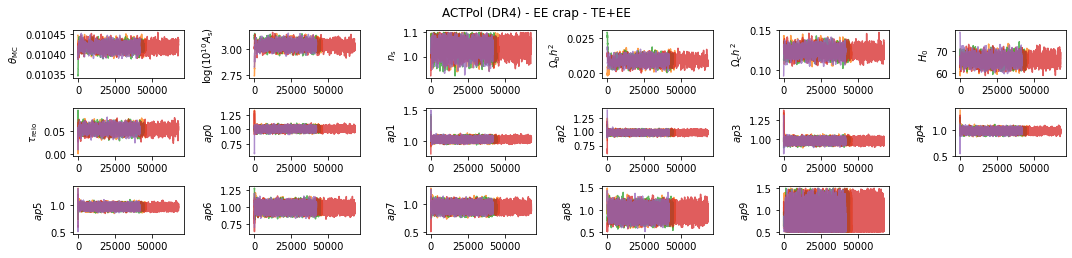

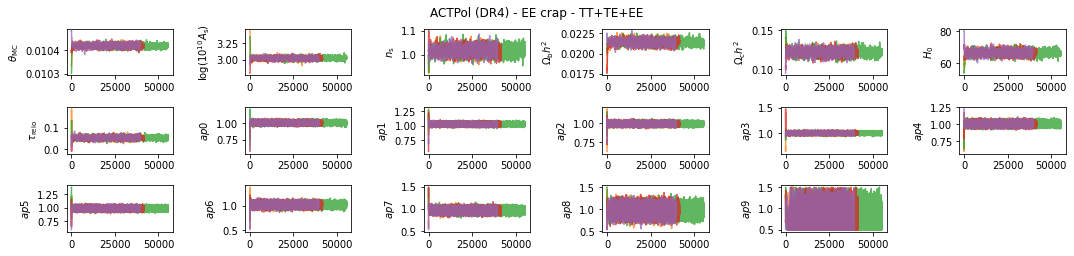

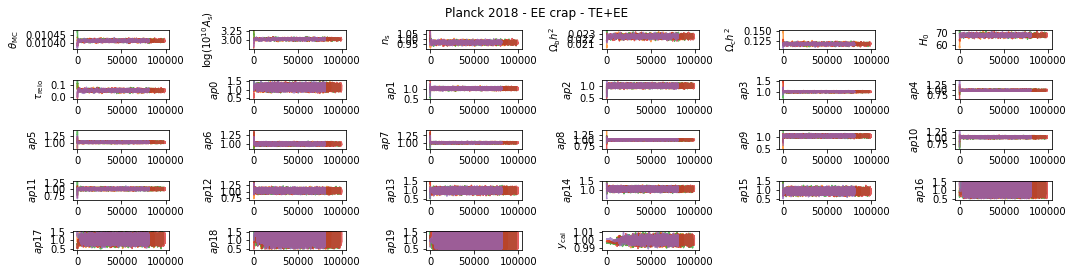

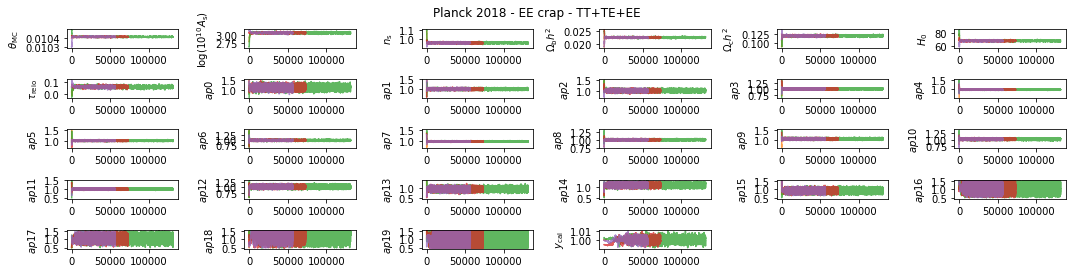

In [6]:
from cobaya_utilities.tools import plot_chains

for k, v in crap_samples.items():
    n = 10 if "ACTPol" in k else 20
    nuisance_params = []
    if "polar eff." in k:
        nuisance_params = polareff_params(n)
    elif "leakage" in k:
        nuisance_params = leakage_params(n)
    elif "crap" in k:
        nuisance_params = ee_crap_params(n)
    nuisance_params += [] if "ACTPol" in k else ["A_planck"]
    plot_chains(v, params=cosmo_params + nuisance_params, title=k, ncol=6)

Let's plot also the Gelman $R-1$ parameter and acceptance rate progress

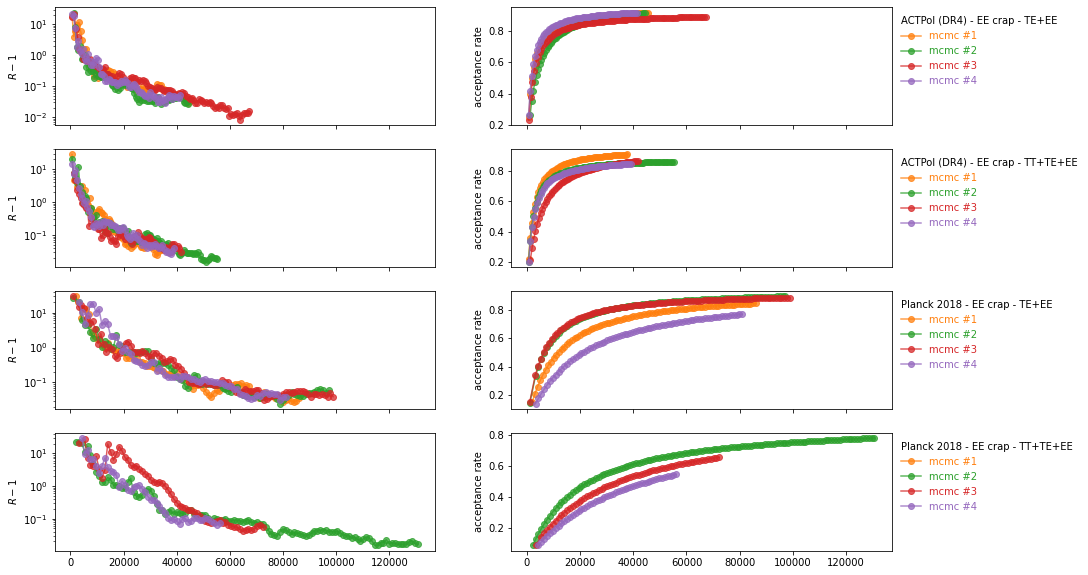

In [7]:
from cobaya_utilities.tools import plot_progress

plot_progress(crap_samples)

## MCMC distributions



Define global plot settings

In [8]:
from getdist.plots import GetDistPlotSettings

plot_settings = GetDistPlotSettings()
plot_settings.num_plot_contours = 3
plot_settings.solid_colors = "tab20"
plot_settings.line_styles = "tab20"
plot_settings.legend_fontsize = 15

Load MCMC samples



In [9]:
from getdist import loadMCSamples

samples = [
    loadMCSamples(os.path.join(path, "mcmc"), settings={"ignore_rows": 0.4})
    for path in mcmc_samples.values()
]

Plot posteriors distributions of CMB parameters



In [10]:
colors = (
    ["grey", "black"]
    + [plt.get_cmap("tab20")(i) for i in [1, 0, 5, 4, 17, 16]]
    + ["gray", "black"]
    + [plt.get_cmap("tab20")(i) for i in [3, 2, 7, 6, 9, 8]]
)


def triangle_plot(sample_range, params, show_tau_prior=True):
    from getdist import plots

    g = plots.get_subplot_plotter(settings=plot_settings)
    legend_labels = [k for i, k in enumerate(mcmc_samples.keys()) if i in sample_range]
    s = [sample for i, sample in enumerate(samples) if i in sample_range]
    c = [color for i, color in enumerate(colors) if i in sample_range]
    g.triangle_plot(
        s, params, filled=False, legend_labels=legend_labels, colors=c, diag1d_kwargs={"colors": c}
    )
    if show_tau_prior:
        # Show prior on tau
        from scipy.stats import norm

        ax = g.subplots[-1, -1]
        xmin, xmax, ymin, ymax = ax.axis()
        x = np.linspace(xmin, xmax, 100)
        y = norm.pdf(x, 0.054, 0.0073)

        ax.plot(x, y / np.max(y), color="gray", ls="--", label=r"$\tau$ prior")
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1));

Plot posteriors distributions of parameters

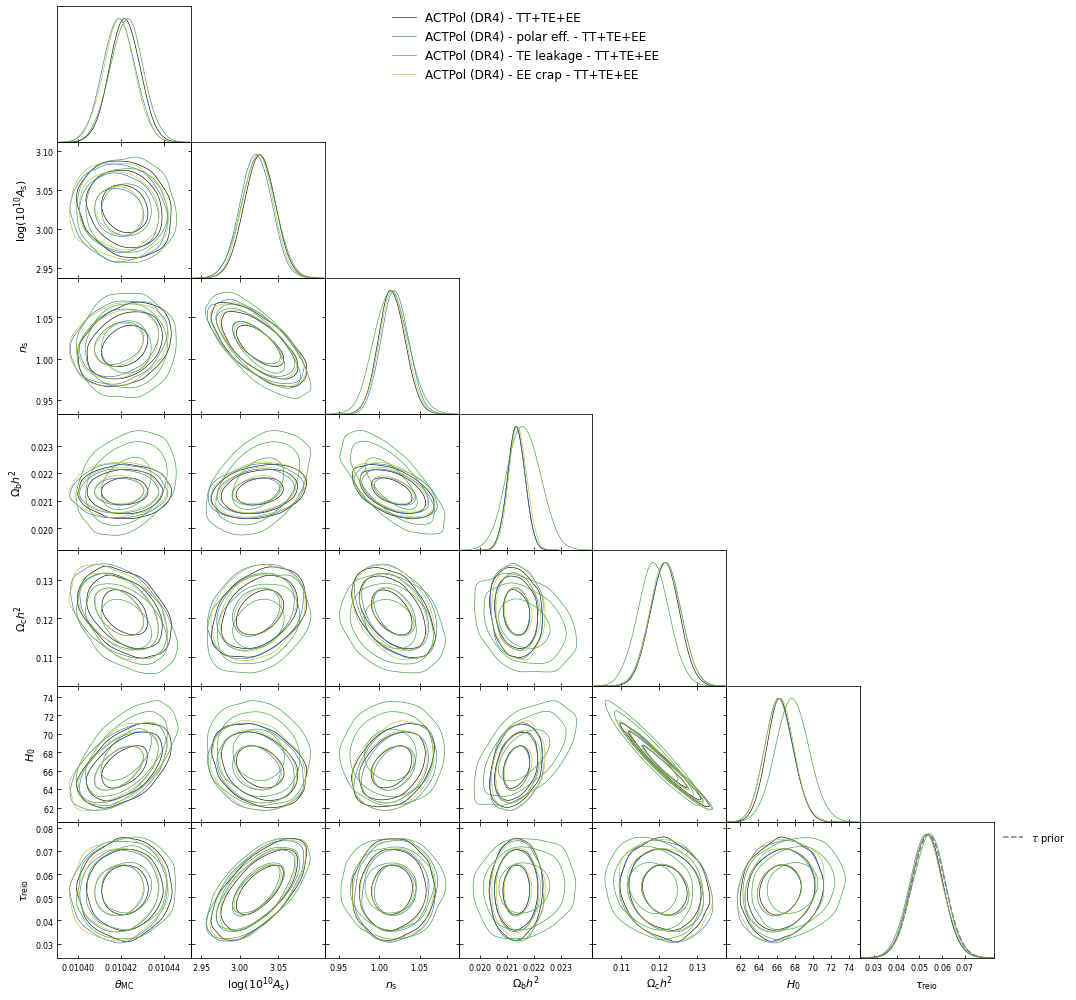

In [11]:
triangle_plot(sample_range=[1, 3, 5, 7], params=cosmo_params)

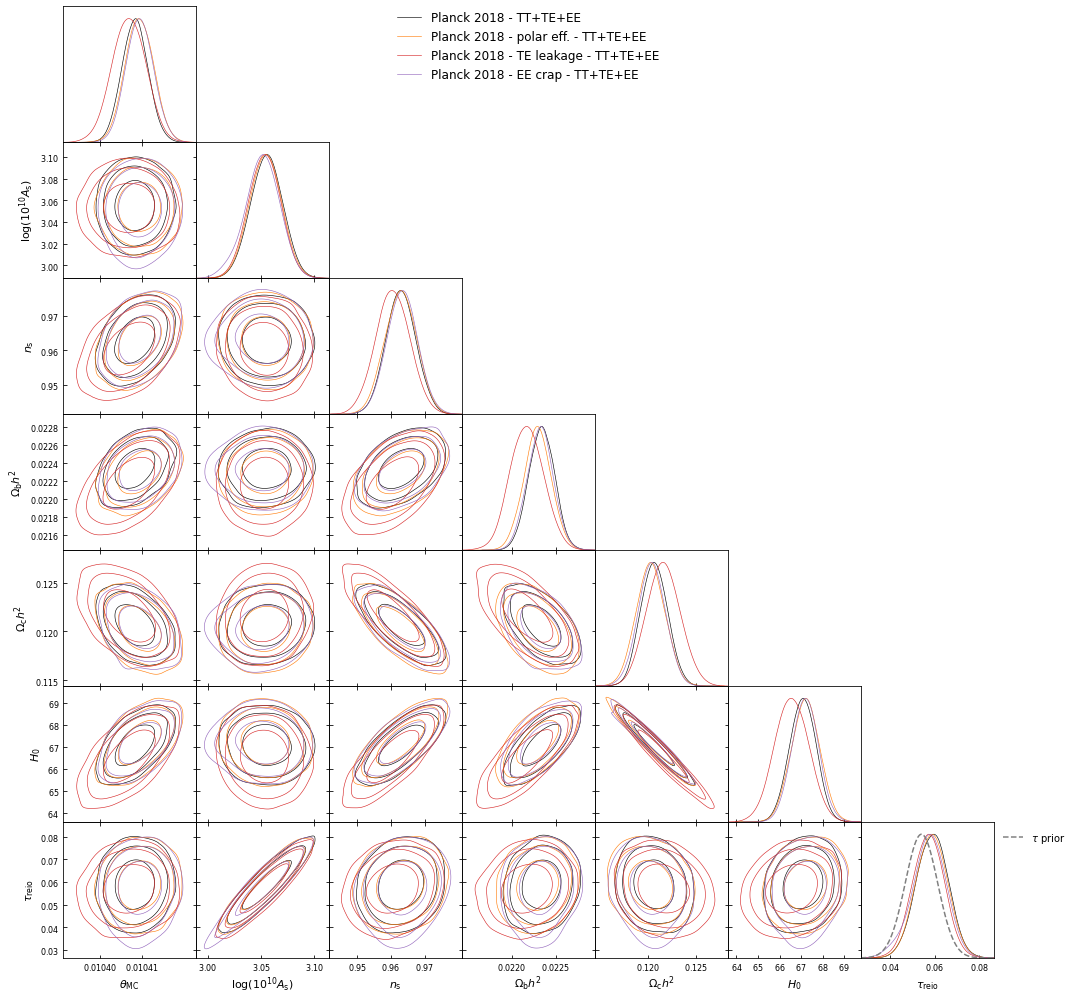

In [12]:
triangle_plot(sample_range=[9, 11, 13, 15], params=cosmo_params)

### Correlation plots

In [13]:
def rectangle_plot(sample_range, params1, params2):
    from getdist import plots

    g = plots.get_subplot_plotter(settings=plot_settings)
    legend_labels = [k for i, k in enumerate(mcmc_samples.keys()) if i in sample_range]
    s = [sample for i, sample in enumerate(samples) if i in sample_range]
    c = [color for i, color in enumerate(colors) if i in sample_range]
    g.rectangle_plot(
        params1,
        params2,
        roots=s,
        filled=True,
        legend_labels=legend_labels,
        colors=c,
    );

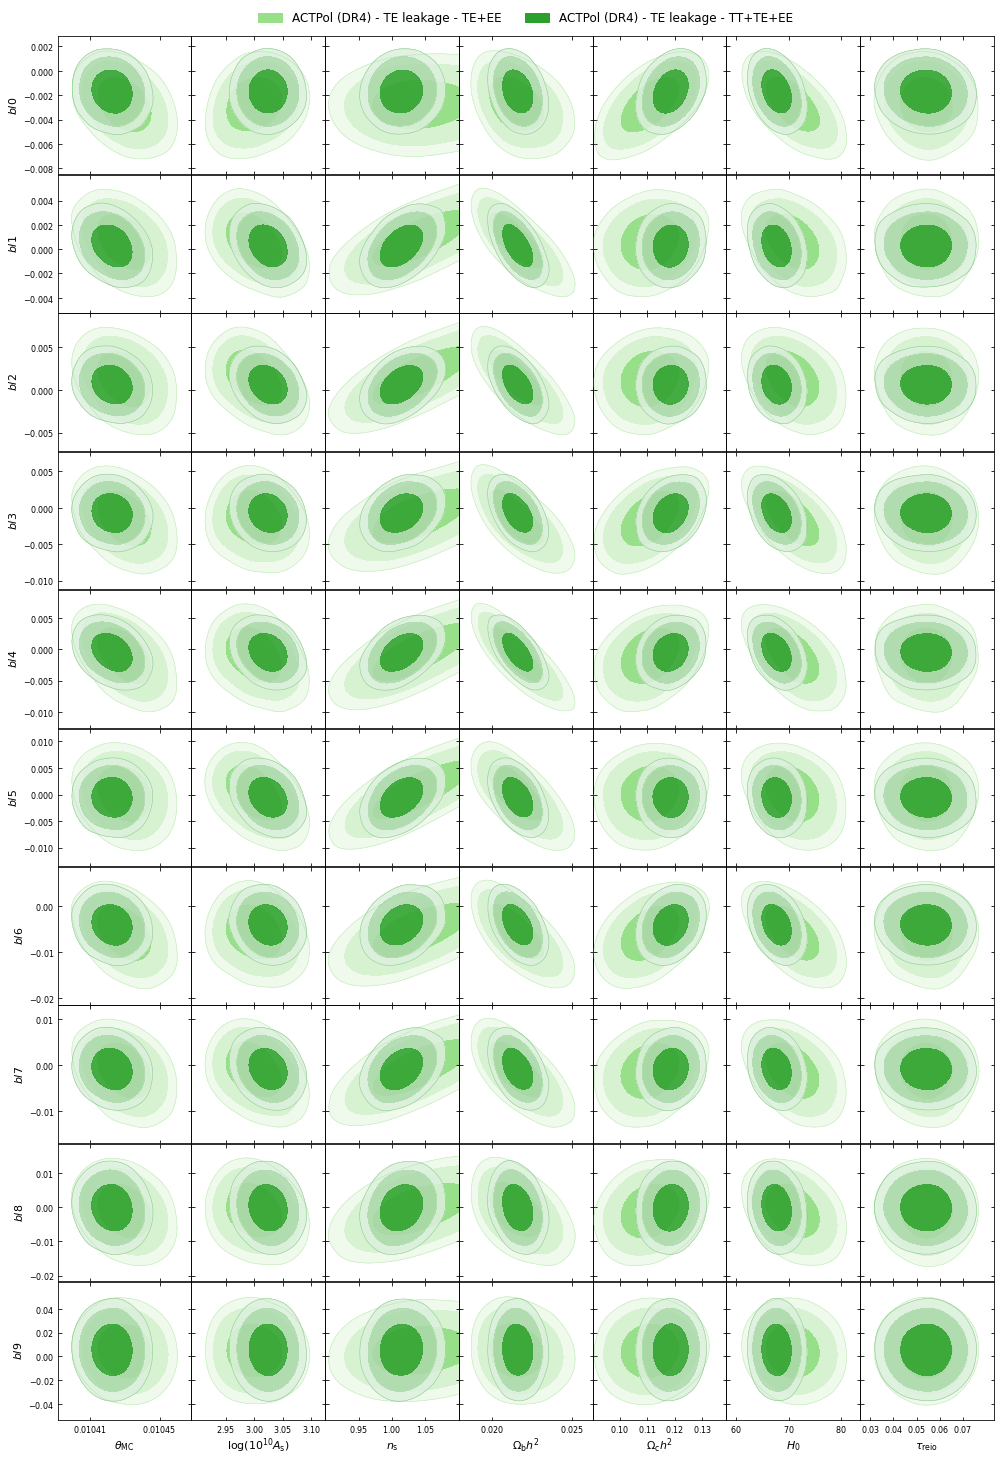

In [14]:
rectangle_plot(sample_range=[4, 5], params1=cosmo_params, params2=leakage_params(10))

In [15]:
def plot_correlation(sample, ax=None, title=""):
    ax = plt.gca() if ax is None else ax
    covmat = sample.getCovMat()
    params = covmat.paramNames
    im = ax.imshow(covmat.correlation(), cmap="RdBu", vmin=-1, vmax=+1)
    ax.set_xticks(np.arange(len(params)))
    ax.set_xticklabels(params, rotation="vertical")
    ax.set_yticks(np.arange(len(params)))
    ax.set_yticklabels(params)
    ax.set_title(title)
    return im

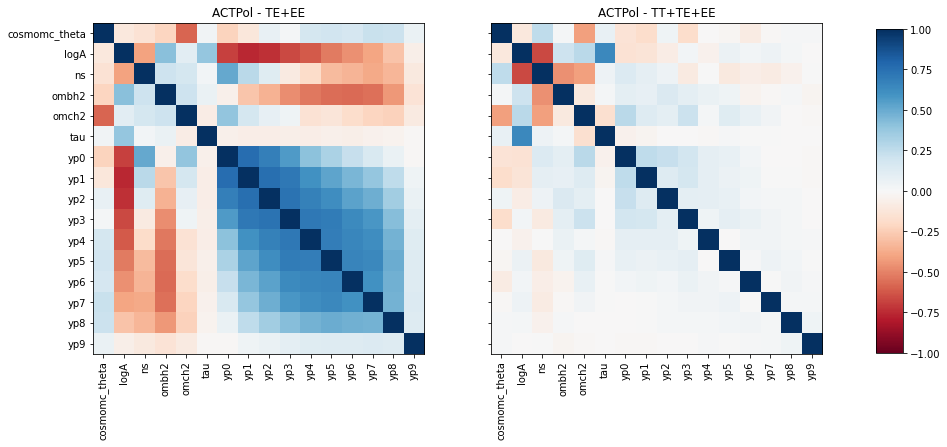

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15), sharey=True)
im = plot_correlation(samples[2], ax=axes[0], title="ACTPol - TE+EE")
im = plot_correlation(samples[3], ax=axes[1], title="ACTPol - TT+TE+EE")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.025, 0.3])
fig.colorbar(im, cax=cbar_ax);

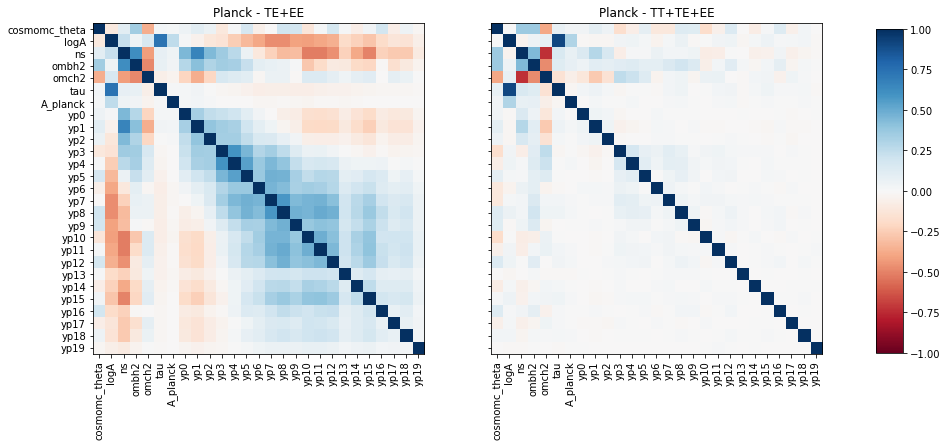

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15), sharey=True)
im = plot_correlation(samples[10], ax=axes[0], title="Planck - TE+EE")
im = plot_correlation(samples[11], ax=axes[1], title="Planck - TT+TE+EE")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.025, 0.3])
fig.colorbar(im, cax=cbar_ax);

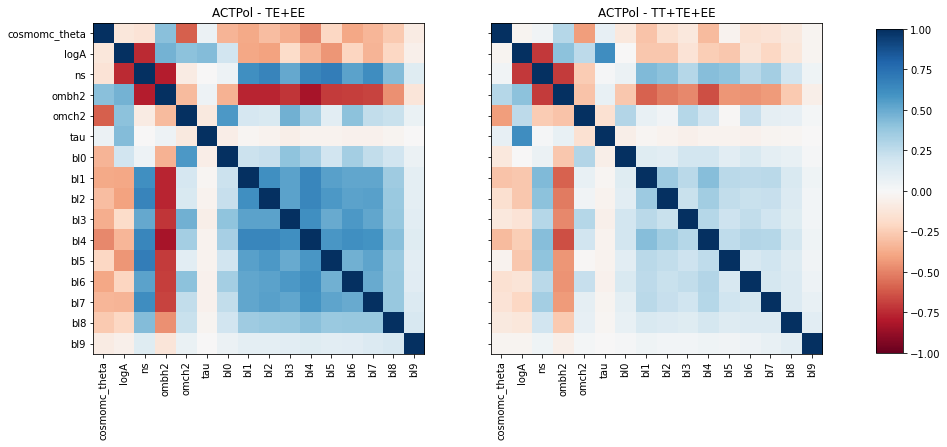

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15), sharey=True)
im = plot_correlation(samples[4], ax=axes[0], title="ACTPol - TE+EE")
im = plot_correlation(samples[5], ax=axes[1], title="ACTPol - TT+TE+EE")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.025, 0.3])
fig.colorbar(im, cax=cbar_ax);

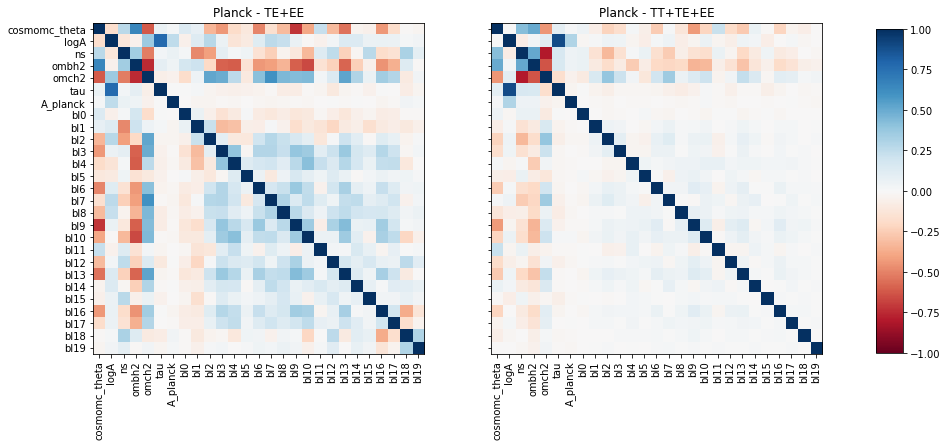

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15), sharey=True)
im = plot_correlation(samples[-4], ax=axes[0], title="Planck - TE+EE")
im = plot_correlation(samples[-3], ax=axes[1], title="Planck - TT+TE+EE")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.025, 0.3])
fig.colorbar(im, cax=cbar_ax);

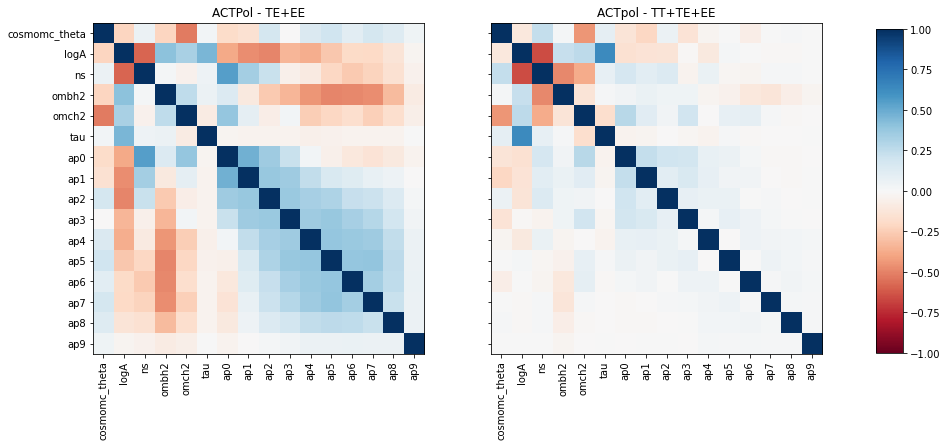

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15), sharey=True)
im = plot_correlation(samples[6], ax=axes[0], title="ACTPol - TE+EE")
im = plot_correlation(samples[7], ax=axes[1], title="ACTpol - TT+TE+EE")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.025, 0.3])
fig.colorbar(im, cax=cbar_ax);

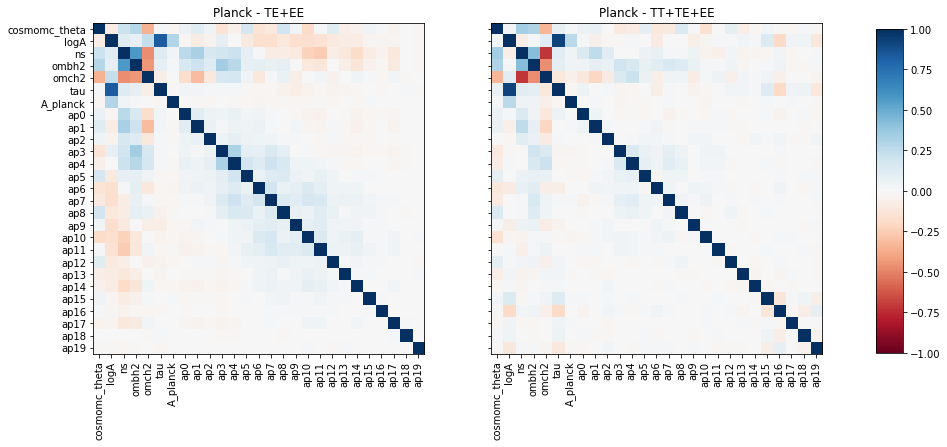

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15), sharey=True)
im = plot_correlation(samples[-2], ax=axes[0], title="Planck - TE+EE")
im = plot_correlation(samples[-1], ax=axes[1], title="Planck - TT+TE+EE")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.025, 0.3])
fig.colorbar(im, cax=cbar_ax);

### Results

In [22]:
import ipywidgets as widgets


def show_table(samples, params):
    samples = samples if isinstance(samples, (list, tuple)) else [samples]
    return widgets.HBox(
        [
            widgets.Image(
                value=sample.getTable(limit=1, paramList=params + ["chi2"])
                .tablePNG(dpi=150, bytesIO=True)
                .read()
            )
            for sample in samples
        ]
    )

In [23]:
show_table(samples=[s for i, s in enumerate(samples) if i in [1, 3, 5, 7]], params=cosmo_params)

In [24]:
show_table(
    samples=[s for i, s in enumerate(samples) if i in [9, 11, 13, 15]],
    params=cosmo_params + ["A_planck"],
)

In [25]:
def plot_results(sample_range, params):
    ll = [k for i, k in enumerate(mcmc_samples.keys()) if i in sample_range]
    s = [sample for i, sample in enumerate(samples) if i in sample_range]
    c = [color for i, color in enumerate(colors) if i in sample_range]
    labels = s[-1].getLatex(params)[0]

    fig, axes = plt.subplots(1, len(params), sharey=True, figsize=(20, 7))
    plt.subplots_adjust(hspace=0, wspace=0.15)

    for i, ax in enumerate(axes):
        ax.spines["left"].set_color(None)
        ax.spines["right"].set_color(None)
        ax.spines["top"].set_color(None)
        ax.tick_params(bottom="off")
        ax.set_yticks([])
        ax.set_xlabel(r"${}$".format(labels[i]))
        if params[i] == "tau":
            ax.axvspan(0.054 - 0.0073, 0.054 + 0.0073, color="0.9")

        for j, (sample, color) in enumerate(zip(s, c)):
            try:
                x = sample.mean(params[i])
                xerr = sample.std(params[i])
            except:
                continue
            ax.errorbar(x, y=j, xerr=xerr, fmt="o", color=color)

    for i, (label, color) in enumerate(zip(ll, c)):
        axes[0].text(
            0,
            (i + 0.5) * 1 / len(ll),
            label,
            ha="right",
            va="center",
            color=color,
            transform=axes[0].transAxes,
        )

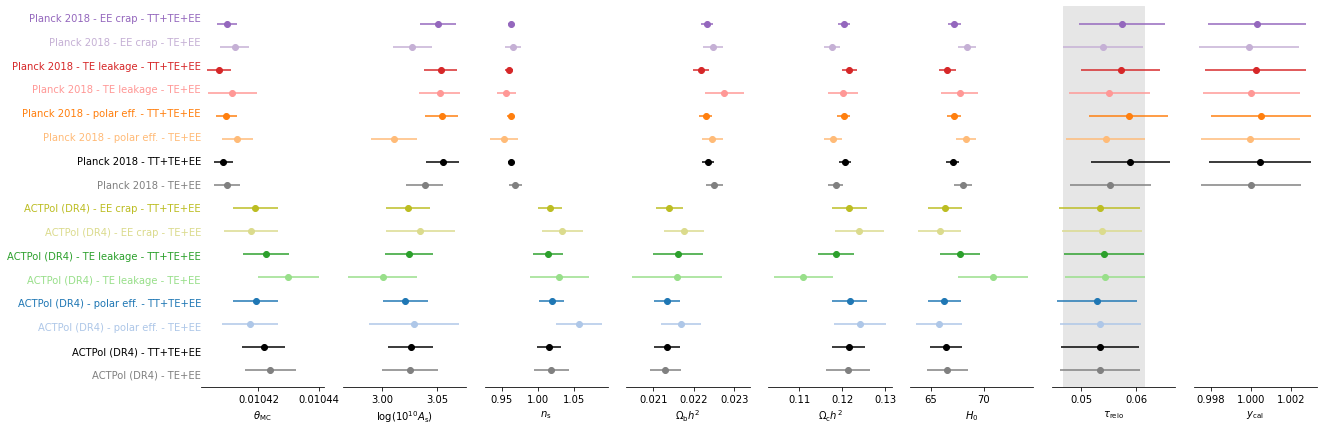

In [26]:
plot_results(sample_range=range(len(samples)), params=cosmo_params + ["A_planck"])

In [27]:
from scipy import stats


def plot_params(samples, labels, colors, params, expected=1.0, ell_range=None, title=None):
    plt.figure(figsize=(10, 6))
    gs = plt.GridSpec(4, 1)
    main = plt.subplot(gs[:3], xticklabels=[])
    dev = plt.subplot(gs[-1])
    for sample, label, color in zip(samples, labels, colors):
        x = np.arange(len(params))
        y = sample.mean(params)
        yerr = sample.std(params)
        chi2 = np.sum((y - expected) ** 2 / yerr ** 2)
        label = f"{label} - $\chi^2$/ndof = {chi2:.2f}/{len(x)} - PTE = {stats.chi2.sf(chi2, len(x)):.2f}"
        main.errorbar(x, y, yerr=yerr, fmt="o", label=label, color=color)
        dev.errorbar(x, (y - expected) / yerr, fmt="o", color=color)
    main.axhline(expected, color="gray", ls="--")
    main.legend(title=title, loc="lower left", labelcolor=colors)
    dev.set_xticks(x)
    dev.set_xticklabels(params)
    dev.set_ylabel(r"$\sigma$")
    dev.axhspan(-1, 1, color="0.9")
    dev.set_ylim(-3, 3)
    upper = main.twiny()
    upper.set_xlabel(r"$\ell$")
    upper.set_xlim(ell_range)

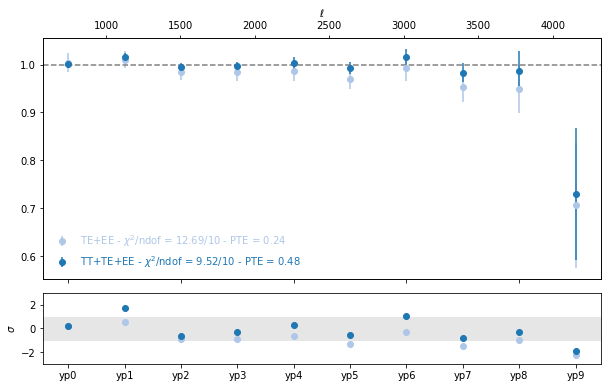

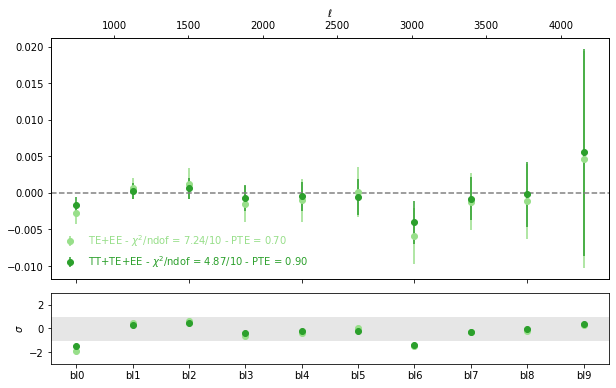

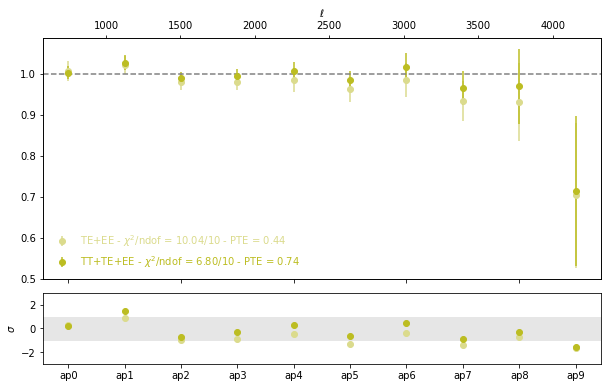

In [28]:
ell_range = (576, 4325)
labels = ("TE+EE", "TT+TE+EE")
plot_params(samples[2:4], labels, colors[2:4], polareff_params(10), ell_range=ell_range)
plot_params(samples[4:6], labels, colors[4:6], leakage_params(10), ell_range=ell_range, expected=0)
plot_params(samples[6:8], labels, colors[6:8], ee_crap_params(10), ell_range=ell_range)

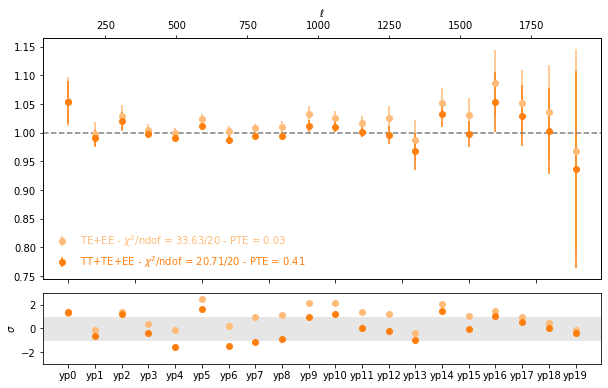

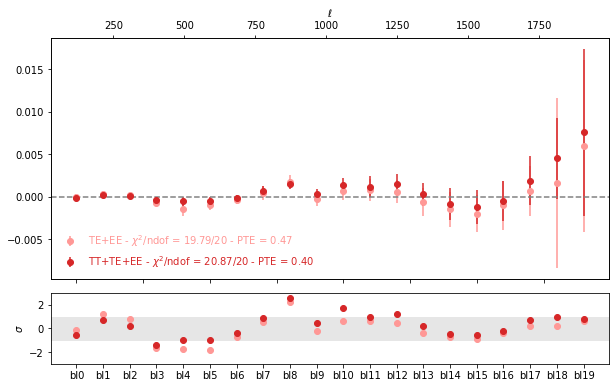

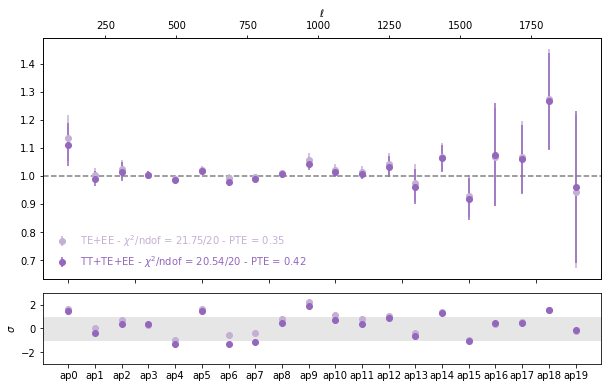

In [29]:
ell_range = (30, 1996)
plot_params(samples[10:12], labels, colors[10:12], polareff_params(20), ell_range=ell_range)
plot_params(
    samples[12:14], labels, colors[12:14], leakage_params(20), expected=0, ell_range=ell_range
)
plot_params(samples[14:16], labels, colors[14:16], ee_crap_params(20), ell_range=ell_range)